In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import ndimage
import mp1_config

In [2]:
# Initialization of paths

path = "./Data"
runs = [os.path.join(path, run) for run in os.listdir(path)]

def retrieve_data(file_to_use) : 
    data = np.loadtxt(file_to_use)
    wavelength = data[:,0]
    even = data[:,1]
    uneven = data[:,2]
    diff = uneven - even

    return (wavelength, diff, even, uneven)

def retrieve_files(run_to_use) : 
    global runs
        
    files = [os.path.join(runs[run_to_use], dat) for dat in os.listdir(runs[run_to_use])]

    return files 

def analyze_files(run_to_use) : 

    files = retrieve_files(run_to_use)
    all_wls, all_diffs, all_even, all_uneven = [], [], [], []
    for file in files :
        wl, diff, even, uneven = retrieve_data(file)
        all_wls.append(wl)
        all_diffs.append(diff)
        all_even.append(even)
        all_uneven.append(uneven)
    
    identical = all(np.array_equal(all_wls[0], arr) for arr in all_wls)
    if not identical : UserWarning("Wavelength bins are not identical")
    
    avg_diff = np.average(all_diffs, axis=0)
    avg_even = np.average(all_even, axis=0)
    avg_uneven = np.average(all_uneven, axis=0)

    return (all_wls[0], avg_diff, avg_even, avg_uneven)

files = retrieve_files(0)
print(files)

['./Data\\20250321_run04\\raw001.DAT', './Data\\20250321_run04\\raw002.DAT', './Data\\20250321_run04\\raw003.DAT', './Data\\20250321_run04\\raw004.DAT', './Data\\20250321_run04\\raw005.DAT', './Data\\20250321_run04\\raw006.DAT', './Data\\20250321_run04\\raw007.DAT', './Data\\20250321_run04\\raw008.DAT', './Data\\20250321_run04\\raw009.DAT', './Data\\20250321_run04\\raw010.DAT', './Data\\20250321_run04\\raw011.DAT', './Data\\20250321_run04\\raw012.DAT', './Data\\20250321_run04\\raw013.DAT', './Data\\20250321_run04\\raw014.DAT', './Data\\20250321_run04\\raw015.DAT', './Data\\20250321_run04\\raw016.DAT', './Data\\20250321_run04\\raw017.DAT', './Data\\20250321_run04\\raw018.DAT', './Data\\20250321_run04\\raw019.DAT', './Data\\20250321_run04\\raw020.DAT', './Data\\20250321_run04\\raw021.DAT', './Data\\20250321_run04\\raw022.DAT', './Data\\20250321_run04\\raw023.DAT', './Data\\20250321_run04\\raw024.DAT', './Data\\20250321_run04\\raw025.DAT', './Data\\20250321_run04\\raw026.DAT', './Data\\20

Text(0, 0.5, 'Counts')

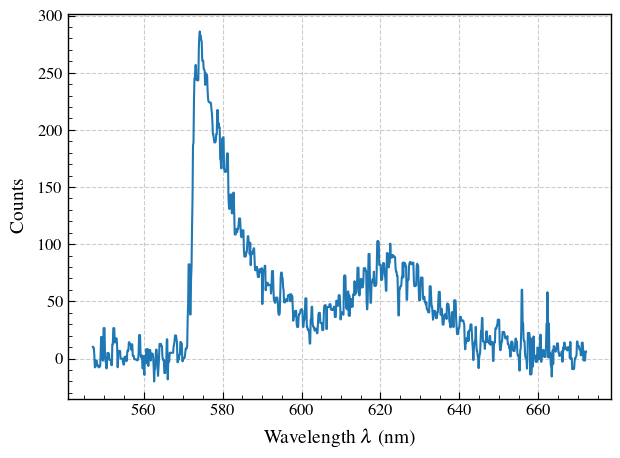

In [3]:
wl, avg_diff, avg_even, avg_uneven = analyze_files(0)

avg_diff_filter = ndimage.median_filter(avg_diff, size=4)

rows, cols = 1, 1
vsize, hsize = 5, 7
fig, ax = plt.subplots(rows, cols, figsize=(cols*hsize, rows*vsize))

ax.plot(wl, avg_diff_filter)
ax.grid(alpha=0.4)
ax.set_xlabel("Wavelength $\lambda$ (nm)")
ax.set_ylabel("Counts")

In [ ]:
final_diff = np.zeros_like(avg_diff_filter)
final_diff_sigma = np.zeros_like(avg_diff_filter)

all_diff_filters = []


for i in range(len(runs)) : 
    
    wl, avg_diff, avg_even, avg_uneven = analyze_files(i)

    avg_diff[avg_diff < 0] = 0

    curr_diff_filtered = ndimage.median_filter(avg_diff, size=3)

    all_diff_filters.append(curr_diff_filtered)

    final_diff += curr_diff_filtered

final_diff *= len(runs)

for index in range(len(final_diff)) : 
    all_vals = np.array(all_diff_filters)[:,i]
    all_vals_err = np.sqrt(all_vals)
    final_diff_sigma[i] = np.mean(all_vals_err)


In [36]:
def find_closest_y(x, y, target):
    x = np.array(x)
    y = np.array(y)
    
    differences = np.abs(x - target)
    
    index = np.argmin(differences)
    
    return y[index]

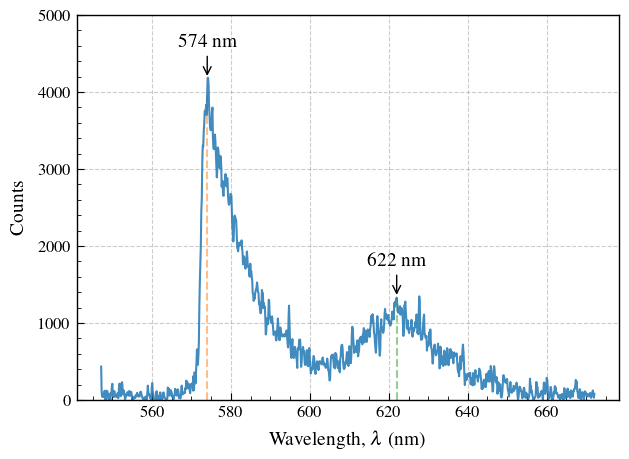

In [70]:
rows, cols = 1, 1
vsize, hsize = 5, 7

fig, ax = plt.subplots(rows, cols, figsize=(cols*hsize, rows*vsize))
ax.set_ylim(0,5000)

first = 574
second = 622

y_first = find_closest_y(wl, final_diff, first)
y_second = find_closest_y(wl, final_diff, second)

ax.vlines(first, 0, y_first, color=f'C{1}', linestyle='--', alpha=0.5)
ax.vlines(second, 0, y_second, color=f'C{2}', linestyle='--', alpha=0.5)

ax.plot(wl, final_diff, alpha=0.85)

arrow_offset = max(final_diff) * 0.1

ax.annotate(f'{first} nm',
            xy=(first, y_first + 0.5*arrow_offset),       
            xytext=(first, y_first + arrow_offset + 0.5*arrow_offset ),
            ha='center',
            arrowprops=dict(facecolor=f'C{1}', arrowstyle='->'))

ax.annotate(f'{second} nm',
            xy=(second, y_second),
            xytext=(second, y_second + arrow_offset),
            ha='center',
            arrowprops=dict(facecolor=f'C{2}', arrowstyle='->'))


ax.grid(alpha=0.4)
ax.set_xlabel("Wavelength, $\lambda$ (nm)")
ax.set_ylabel("Counts")

fig.savefig("./Figures/flouresence_signal.png", format='png', bbox_inches='tight', dpi=300)